# Ergodic Performance Bounds in Fading Channels with Fixed Rayleigh Fading Marginals

_Author:_ Karl-Ludwig Besser, Technische Universität Braunschweig

This notebook is part of the paper "Copula-Based Bounds for Multi-User Communications - Part I: Average Performance" ([doi:XXX](https://doi.org/XXX)).  
If you use any of this work, please cite the above paper.

> If you are not familiar with Jupyter notebooks: The easiest way to use this notebook interactively, is to hit `Kernel --> Restart & Run All` in the menu. The will execute all cells and enable the interactive elements of the plots.  
> Alternatively, you can execute the cells one by one using Shift+Return

In [1]:
import numpy as np
from scipy import integrate
from scipy.special import expi
from scipy import stats
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import interact

# Scenario

We consider a channel with fading and interference: Alice wants to transmit a message to Bob over a channel with gain $X$. At the same time, another user transmits which causes interference modeled by $Y$.

In the following, we will consider the case of Rayleigh fading. The receive signals $X$ and $Y$ are therefore exponentially distributed, i.e., $X\sim\exp(\lambda_{x})$, $Y\sim\exp(\lambda_{y})$.

# SINR

This gives the following expressions of the signal-to-interference-plus-noise ratio (SINR) and capacity:
$$\text{SINR} = \frac{{X}}{s + {Y}}$$

The signal-to-noise ratio (SNR) is given as $\text{SNR}=1/s$.

In [2]:
from expectation_bounds import lower_sinr, upper_sinr, indep_sinr
s = 1
lam_x = 1
lam_y = 2
print("{:4f} <= E[X/(1+Y)] <= {:4f}".format(lower_sinr(s, lam_x, lam_y), upper_sinr(s, lam_x, lam_y)))
print("Independent X, Y: E[X/(1+Y)] = {:4f}".format(indep_sinr(s, lam_x, lam_y)))

0.554686 <= E[X/(1+Y)] <= 0.870213
Independent X, Y: E[X/(1+Y)] = 0.722657


# MAC Capacity

The achievable rate for the first user in a MAC with successive interference cancellation is given by
$$ R^{(1)}_{\text{MAC}} = \log_2\left(1+\frac{X}{s+Y}\right) $$

In the following, we show the bounds and the independent case for the expected capacity $\mathbb{E}\left[R^{(1)}_{\text{MAC}}\right]$ for Rayleigh fading.  

The dashed lines indicate the limits for $\mathsf{SNR}\to\infty$.

In [12]:
from expectation_bounds import lower_mac_rate, upper_mac_rate, indep_mac_rate
from expectation_bounds import limit_indep_mac_rate, limit_lower_mac_rate

def calc_mac_rate(snr_db, bound='min', lam_x=1, lam_y=1):
    snr_lin = 10**(snr_db/10.)
    if bound.startswith('ind'):
        return indep_mac_rate(lam_x=lam_x, lam_y=lam_y, snr=snr_lin)
    elif bound.startswith('min') or bound.startswith('low'):
        return lower_mac_rate(lam_x=lam_x, lam_y=lam_y, snr=snr_lin)
    elif bound.startswith('max') or bound.startswith('up'):
        return upper_mac_rate(lam_x=lam_x, lam_y=lam_y, snr=snr_lin)
    else:
        return NotImplemented

In [13]:
def mac_rate_plot():
    fig, ax = plt.subplots(num="Ergodic MAC Rate")
    ax.set_xlabel("SNR [dB]")
    ax.set_ylabel("Ergodic MAC Rate")
    ax.set_ylim([0, 3])
    plots = {}
    snr_db = np.arange(-5, 26)
    keys = ['min', 'max', 'ind']
    for _key in keys:
        plots[_key] = ax.plot(snr_db, np.zeros(len(snr_db)), 'o-', label=_key)[0]
    limit_funcs = {"limit_ind": limit_indep_mac_rate, "limit_min": limit_lower_mac_rate}
    limit_plots = {k: ax.plot([min(snr_db), max(snr_db)], [1, 1], '--', label=k)[0] for k in limit_funcs.keys()}
    fig.legend()
    
    def update_plot(lam_x=1, lam_y=1):
        for _key, _plot in plots.items():
            _plot.set_ydata(calc_mac_rate(snr_db, _key, lam_x=lam_x, lam_y=lam_y))
        for _key, _func in limit_funcs.items():
            _limit = _func(lam_x, lam_y)
            limit_plots[_key].set_ydata(_limit)
    
    interact(update_plot, lam_x=(.1, 3., .1), lam_y=(.25, 5., .25))

<IPython.core.display.Javascript object>


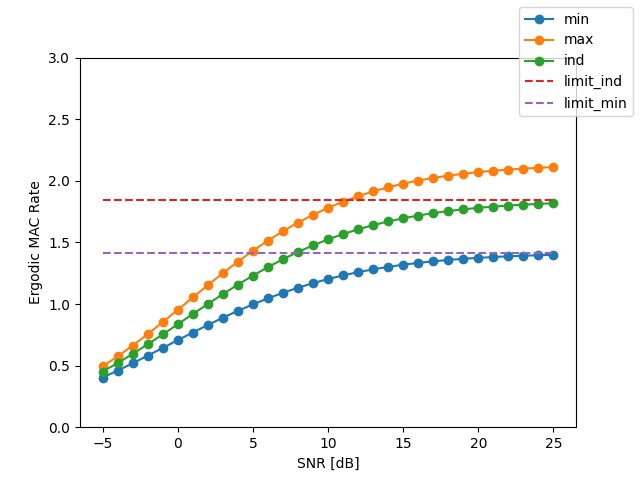

interactive(children=(FloatSlider(value=1.0, description='lam_x', max=3.0, min=0.1), FloatSlider(value=1.0, de…

In [14]:
mac_rate_plot()

# Sum Rate

The sum rate is given by
$$ R_{\text{Sum}} = \log_2\left(1 + \rho_{x}X + \rho_{y}Y\right) $$
where $\rho_{x}$ und $\rho_{y}$ are the SNRs for user 1 and 2, respectively.

In the following, we show the bounds and the independent case for the expected sum rate $\mathbb{E}\left[R_{\text{Sum}}\right]$ for Rayleigh fading.

In [6]:
from expectation_bounds import lower_sum_rate, upper_sum_rate, indep_sum_rate

def calc_sum_rate(snr_db, bound='min', lam_x=1, lam_y=1):
    snr_lin = 10**(snr_db/10.)
    #s = 1./snr_lin
    if bound.startswith('ind'):
        return indep_sum_rate(lam_x=lam_x, lam_y=lam_y, snr_x=snr_lin, snr_y=snr_lin)
    elif bound.startswith('min') or bound.startswith('low'):
        return lower_sum_rate(lam_x=lam_x, lam_y=lam_y, snr_x=snr_lin, snr_y=snr_lin)
    elif bound.startswith('max') or bound.startswith('up'):
        return upper_sum_rate(lam_x=lam_x, lam_y=lam_y, snr_x=snr_lin, snr_y=snr_lin)
    else:
        return NotImplemented

In [15]:
def sum_rate_plot():
    fig, ax = plt.subplots(num="Ergodic Sum Rate")
    ax.set_xlabel("SNR $\\rho_{x}=\\rho_{y}$ [dB]")
    ax.set_ylabel("Ergodic Sum Rate")
    ax.set_ylim([0, 6])
    plots = {}
    snr_db = np.arange(-5, 16)
    keys = ['min', 'max', 'ind']
    #keys = ['min']
    for _key in keys:
        plots[_key] = ax.plot(snr_db, np.zeros(len(snr_db)), 'o-', label=_key)[0]
    fig.legend()
    
    def update_plot(lam_x=1, lam_y=1):
        for _key, _plot in plots.items():
            _plot.set_ydata(calc_sum_rate(snr_db, _key, lam_x=lam_x, lam_y=lam_y))
        fig.canvas.draw_idle()
    
    interact(update_plot, lam_x=(.1, 3., .1), lam_y=(.1, 3., .1))

<IPython.core.display.Javascript object>


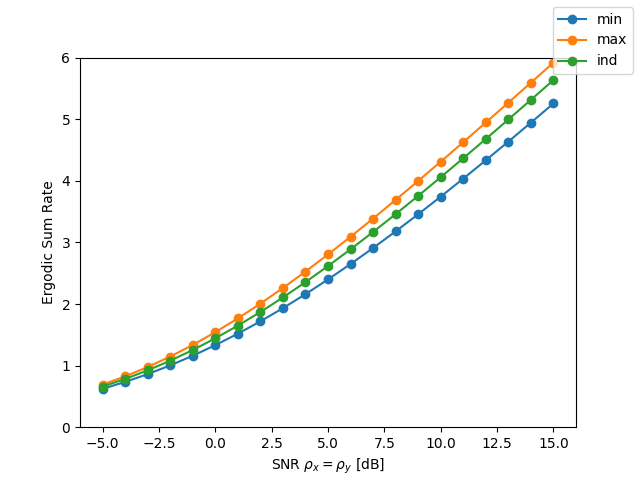

interactive(children=(FloatSlider(value=1.0, description='lam_x', max=3.0, min=0.1), FloatSlider(value=1.0, de…

In [16]:
sum_rate_plot()